In [ ]:
!pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 7.0 kB/s 
     |████████████████████████████████| 578.1 MB 26 kB/s 
     |████████████████████████████████| 578.0 MB 16 kB/s 
     |████████████████████████████████| 511.8 MB 27 kB/s 
     |████████████████████████████████| 1.6 MB 49.7 MB/s 


In [ ]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh

In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
import tensorflow_datasets as tfds
# Bringing in matplotlib for viz stuff
from matplotlib import pyplot as plt

In [ ]:
ds = tfds.load('fashion_mnist', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incomplete103BPO/fashion_mnist-train.tfrecord*...:   0%|  …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incomplete103BPO/fashion_mnist-test.tfrecord*...:   0%|   …

Dataset fashion_mnist downloaded and prepared to ~/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
ds.as_numpy_iterator().next()['label']

2

## Data Visualization

In [ ]:
import numpy as np

In [ ]:
dataiterator = ds.as_numpy_iterator()

In [ ]:
dataiterator.next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

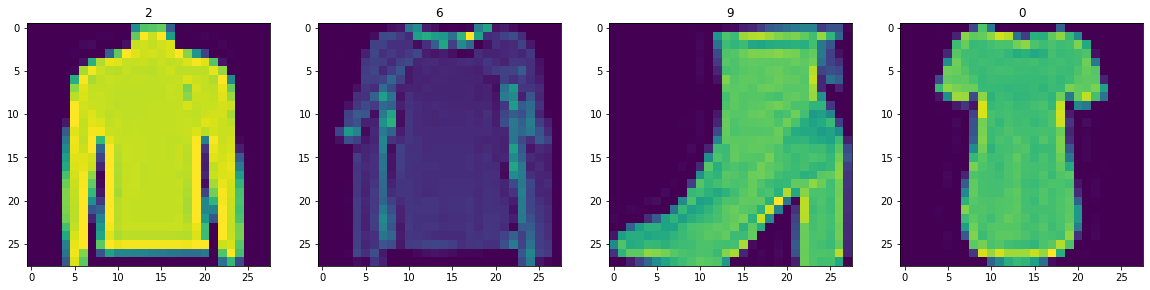

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images 
for idx in range(4): 
    # Grab an image and label
    sample = dataiterator.next()
    # Plot the image using a specific subplot 
    ax[idx].imshow(np.squeeze(sample['image']))
    # Appending the image label as the plot title 
    ax[idx].title.set_text(sample['label'])

In [ ]:
def scale_images(data): 
    image = data['image']
    return image / 255

In [ ]:
ds = tfds.load('fashion_mnist', split='train')
# Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images) 
# Cache the dataset for that batch 
ds = ds.cache()
# Shuffle it up 
ds = ds.shuffle(60000)
# Batch into 128 images per sample
ds = ds.batch(128)
# Reduces the likelihood of bottlenecking 
ds = ds.prefetch(64)

In [ ]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

## Building a Neural Network

#### Modelling Components

In [ ]:
## sequential API for the generator and discriminator
from tensorflow.keras.models import Sequential

## layers for neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

#### Building a Generator

In [ ]:
def build_generator():
  model = Sequential()

  ## reshape random values

  model.add(Dense(7*7*128, input_dim = 128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))
  
  ## block 1 upsampling
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  ## block 2 upsampling
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))

  ## block 1 conv
  model.add(Conv2D(128, 4, padding='same'))
  model.add(LeakyReLU(0.2))

  ## block 2 conv
  model.add(Conv2D(128, 4, padding='same'))
  model.add(LeakyReLU(0.2))

  ## CNN layer to get 1 channel
  model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))

  return model

In [ ]:
test_model = build_generator()

In [ ]:
test_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [ ]:
img = test_model.predict(np.random.randn(4, 128, 1))


1/1 [==============================] - 7s 7s/step


In [ ]:
img.shape

(4, 28, 28, 1)

1/1 [==============================] - 0s 17ms/step


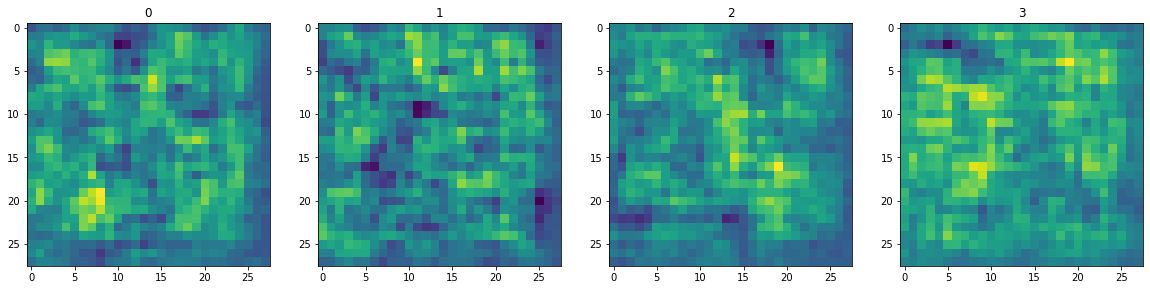

In [ ]:
## random sampling
img = test_model.predict(np.random.randn(4,128,1))

## formatting subplot 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

## looping 4 times  
for idx, img in enumerate(img): 
  
    ## plotting the image  
    ax[idx].imshow(np.squeeze(img))

    ## appending the image label  
    ax[idx].title.set_text(idx)

#### Building Discriminator

In [ ]:
## to determine if the image is real or fake

def build_discriminator():
  model = Sequential()

  ## conv block 1
  model.add(Conv2D(32, 5, input_shape = (28, 28, 1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  ## conv block 2
  model.add(Conv2D(64, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  ## conv block 3
  model.add(Conv2D(128, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  ## conv block 4
  model.add(Conv2D(256, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  ## flattening the model
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation = 'sigmoid'))

  return model

In [ ]:
discriminator = build_discriminator()

In [ ]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [ ]:
img.shape

(28, 28, 1)

In [ ]:
discriminator.predict(np.expand_dims(img,0))

1/1 [==============================] - 0s 163ms/step


array([[0.49821433]], dtype=float32)

## Custom Training Loop

In [ ]:
## using adam optimizer
from tensorflow.keras.optimizers import Adam

## using BinaryCrossEntropy for loss
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
g_opt = Adam(learning_rate = 0.0001)
d_opt = Adam(learning_rate = 0.00001)

g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
class FaceGAN(Model):
  def __init__(self, test_model, discriminator, *args, **kwargs):
    super().__init__(*args, **kwargs)

    ## creating attributes
    self.test_model = test_model
    self.discriminator = discriminator
    

  def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
    
    super().compile(*args, **kwargs)

    ## creatinug attributes
    self.g_opt = g_opt
    self.d_opt = d_opt
    self.g_loss = g_loss
    self.d_loss = d_loss

  def train_step(self, batch):
    real_images = batch
    fake_images = self.test_model(tf.random.normal((128, 128, 1)), training = False)

    ## discriminator training
    with tf.GradientTape() as d_tape:
      yhat_real = self.discriminator(real_images, training = True)
      yhat_fake = self.discriminator(fake_images, training = True)
      yhat_realfake = tf.concat([yhat_real, yhat_fake], axis = 0)

      ## create labels for real or fake
      y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis = 0)
      ## REAL IMAGES HAVE 0 LABELS, FAKE IMAGES HAVE 1 LABELS

      ## injecting noise for slow discrimination training
      noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
      noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
      y_realfake += tf.concat([noise_real, noise_fake], axis = 0)

      ## loss calculation
      total_d_loss = self.d_loss(y_realfake, yhat_realfake)

    #applying backprop
    dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
    self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

    with tf.GradientTape() as g_tape:

      ## generate new images
      gen_images = self.test_model(tf.random.normal((128, 128, 1)), training = True)
      
      ## predective labels creation
      predicted_labels = self.discriminator(gen_images, training = False)

      ## loss calculation - fake out discriminator
      total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)
    
    ## backprop application
    ggrad = g_tape.gradient(total_g_loss, self.test_model.trainable_variables)
    self.g_opt.apply_gradients(zip(ggrad, self.test_model.trainable_variables))

    return {"d_loss": total_d_loss, "g_loss": total_g_loss}
    

In [ ]:
face_gan = FaceGAN(test_model, discriminator)

In [ ]:
face_gan.compile(g_opt, d_opt, g_loss, d_loss)

#### Callback Creation

In [ ]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [1]:
'''

            '''

'\n\n            '

#### Training

In [ ]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [ ]:
## train for large number of epochs
hist = face_gan.fit(ds, epochs = 200)

Epoch 1/200
469/469 [==============================] - 71s 141ms/step - d_loss: 0.5282 - g_loss: 1.3912
Epoch 2/200
469/469 [==============================] - 67s 143ms/step - d_loss: 0.2922 - g_loss: 2.3631
Epoch 3/200
469/469 [==============================] - 68s 146ms/step - d_loss: 0.3757 - g_loss: 2.2776
Epoch 4/200
469/469 [==============================] - 70s 149ms/step - d_loss: 0.6294 - g_loss: 0.6833
Epoch 5/200
469/469 [==============================] - 70s 149ms/step - d_loss: 0.5301 - g_loss: 0.2004
Epoch 6/200
469/469 [==============================] - 70s 150ms/step - d_loss: 0.6716 - g_loss: 0.6429
Epoch 7/200
469/469 [==============================] - 70s 149ms/step - d_loss: 0.6892 - g_loss: 0.4725
Epoch 8/200
469/469 [==============================] - 70s 149ms/step - d_loss: 0.6869 - g_loss: 0.5907
Epoch 9/200
469/469 [==============================] - 70s 150ms/step - d_loss: 0.6947 - g_loss: 0.6223
Epoch 10/200
469/469 [==============================] - 71s 151m

In [ ]:
hist.history

{'d_loss': [0.34286075830459595,
  0.2764456272125244,
  0.7058458924293518,
  0.40237030386924744,
  0.771586537361145,
  0.5857779383659363,
  0.680144190788269,
  0.6274465322494507,
  0.745703399181366,
  0.6985859870910645,
  0.6989796757698059,
  0.6897825002670288,
  0.7214480638504028,
  0.5682317018508911,
  0.5806419253349304,
  0.6898812055587769,
  0.7977982759475708,
  0.5168808698654175,
  0.7645958662033081,
  0.7001206278800964,
  0.7477970123291016,
  0.6932677030563354,
  0.7240648865699768,
  0.6156500577926636,
  0.7077974677085876,
  0.5040026903152466,
  0.6897174119949341,
  0.523527979850769,
  0.6821553111076355,
  0.3291293680667877,
  0.3536665439605713,
  0.7338510155677795,
  0.452735960483551,
  0.790581226348877,
  0.785075843334198,
  0.4653155505657196,
  0.7311020493507385,
  0.42035502195358276,
  0.8128854036331177,
  0.8618468642234802,
  0.6948547959327698,
  0.7159801125526428,
  0.7476759552955627,
  0.7737627029418945,
  0.3983179032802582,
  0.

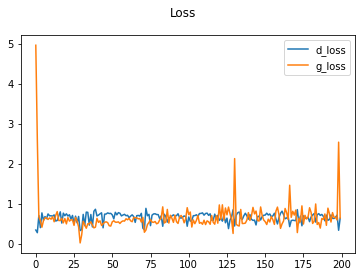

In [ ]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label = 'd_loss')
plt.plot(hist.history['g_loss'], label = 'g_loss')
plt.legend()
plt.show()

## Final Test

In [ ]:
imgs = test_model.predict(tf.random.normal((16, 128, 1))) 

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 25ms/step


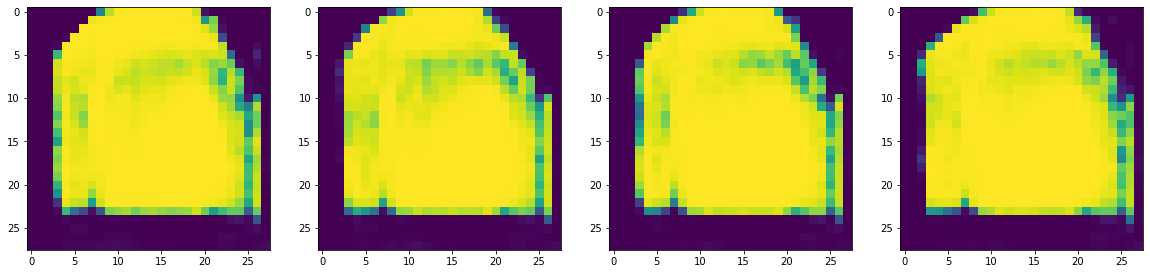

In [ ]:
fig, ax = plt.subplots(ncols = 4, figsize = (25, 25))
for r in range(4):
  for c in range(4):
    ax[r][c].imshow(imgs[(r+1)*(c+1)-1])